## Author: Laisha Wadhwa
## email id: laisha.w16@iiits.in


In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding

In [237]:
# Read the data file
CC_data = pd.read_csv("train.csv")
# Replace "?" with NaN
CC_data.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
CC_data["Age"] = pd.to_numeric(CC_data["Age"])
CC_data = CC_data.drop(['Key'], axis=1)
# CC_data2 = CC_data[:,:]


In [163]:
CC_data.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [164]:
CC_data.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,578.000000,590.000000,590.000000,590.000000,590.000000
mean,31.258270,4.609390,2.088534,2.045763,918.706780
std,12.014247,4.849569,3.198681,3.702375,5025.415369
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,1.000000,0.165000,0.000000,0.000000
50%,28.125000,2.710000,1.000000,0.000000,4.000000
75%,37.500000,7.000000,2.500000,2.000000,363.000000
max,80.250000,26.335000,20.000000,20.000000,100000.000000


In [238]:
CC_data.isnull().sum()

Male              11
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

## 2. Data Preparation
  - __Data Cleaning__: 
      1. Imputing with mode for categorical values
      2. Imputing with mean for numerical variables

In [239]:
# Imputing missing values for numerical columns with mean value
CC_data.fillna(CC_data.mean(), inplace=True)

In [240]:
CC_data.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
580,b,38.67,0.210,u,g,k,v,0.085,t,f,0,t,g,280,0,+
581,b,25.75,0.750,u,g,c,bb,0.250,t,f,0,f,g,349,23,+
582,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396,4159,+
583,a,21.50,6.000,u,g,aa,v,2.500,t,t,3,f,g,80,918,+
584,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240,768,+
585,b,20.50,2.415,u,g,c,v,2.000,t,t,11,t,g,200,3000,+
586,a,29.50,0.460,u,g,k,v,0.540,t,t,4,f,g,380,500,+
587,b,16.17,0.040,u,g,c,v,0.040,f,f,0,f,g,0,0,+
588,b,22.67,0.165,u,g,c,j,2.250,f,f,0,t,s,0,0,+
589,a,25.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+


In [241]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 16 columns):
Male              579 non-null object
Age               590 non-null float64
Debt              590 non-null float64
Married           584 non-null object
BankCustomer      584 non-null object
EducationLevel    581 non-null object
Ethnicity         581 non-null object
YearsEmployed     590 non-null float64
PriorDefault      590 non-null object
Employed          590 non-null object
CreditScore       590 non-null int64
DriversLicense    590 non-null object
Citizen           590 non-null object
ZipCode           577 non-null object
Income            590 non-null int64
Approved          590 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 73.8+ KB


In [244]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(CC_data)

In [245]:
CC_data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

## 3. Data description and distribution

- Correlation Matrix for all the features
- DistPlot for analysing the distribution of univariate variables
- Scatter plot for 'Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed' for analysing the effect of each of the features on other features
- barplots and pd.groupby are used to analyse the effect of features like education leval and prior default on the predicting variable Approved.

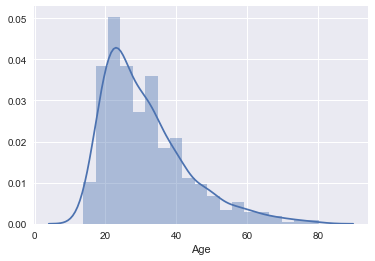

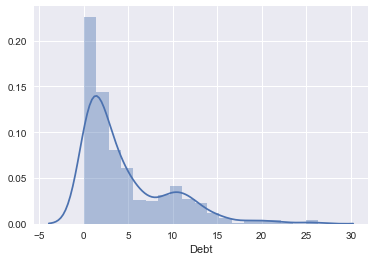

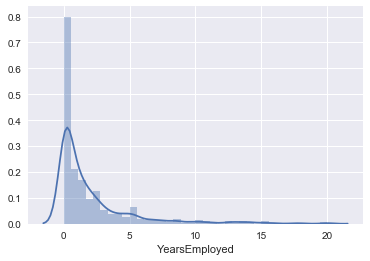

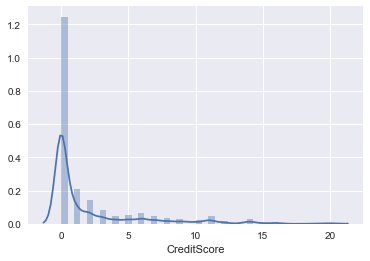

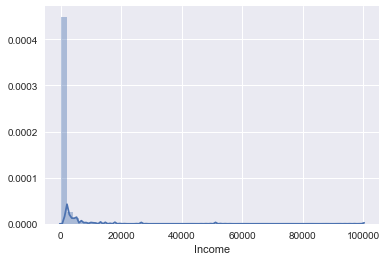

In [169]:
def plotDistPlot(col):
    """Flexibly plotting a univariate distribution of observation
        univariate histogram
    """
    sns.distplot(col)
    plt.show()
plotDistPlot(CC_data['Age'])
plotDistPlot(CC_data['Debt'])
plotDistPlot(CC_data['YearsEmployed'])
plotDistPlot(CC_data['CreditScore'])
plotDistPlot(CC_data['Income'])

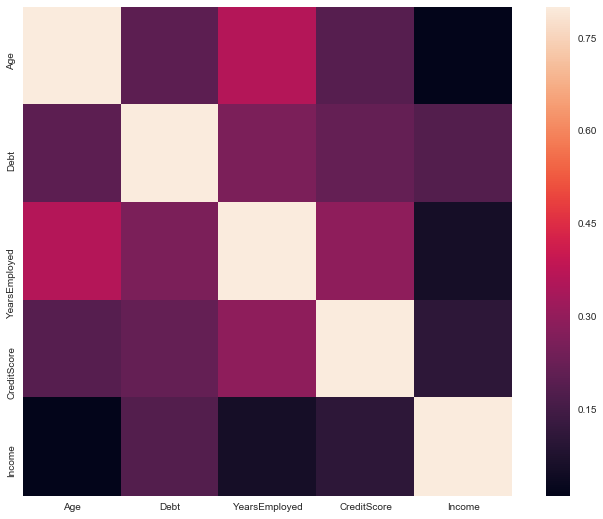

In [170]:
#correlation matrix
corrmat = CC_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

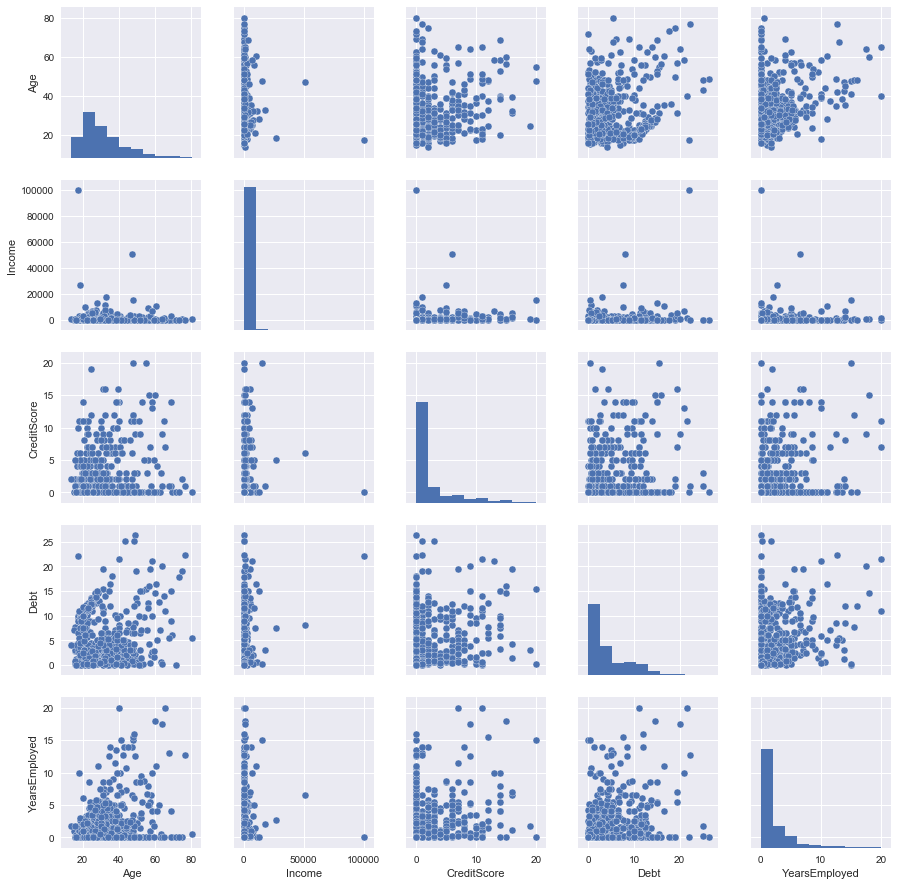

In [171]:
#scatterplot
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(CC_data[cols], size = 2.5)
plt.show();

60.67796610169491% Credit Cards are approved out of 590 observations


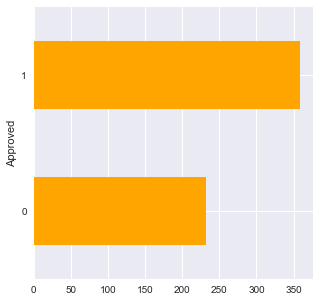

In [359]:
#sns.countplot(data = CC_data, x = 'Approved')
fig = plt.figure()
fig.set_size_inches(5,5)
d = CC_data.groupby(['Approved']).size()

print("{}% Credit Cards are approved out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='orange')

In [355]:
print("shape of the data:", CC_data.shape)

shape of the data: (590, 15)


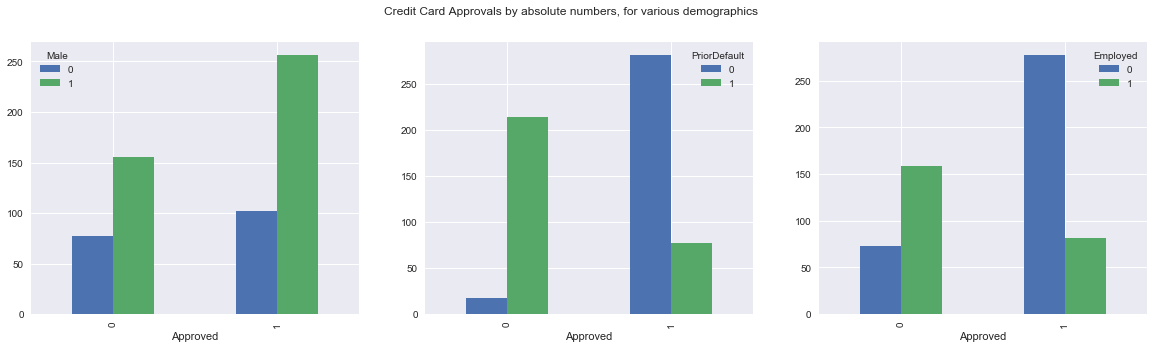

In [360]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Credit Card Approvals by absolute numbers, for various demographics')

d = CC_data.groupby(['Approved', 'Male']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = CC_data.groupby(['Approved', 'PriorDefault']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = CC_data.groupby(['Approved', 'Employed']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

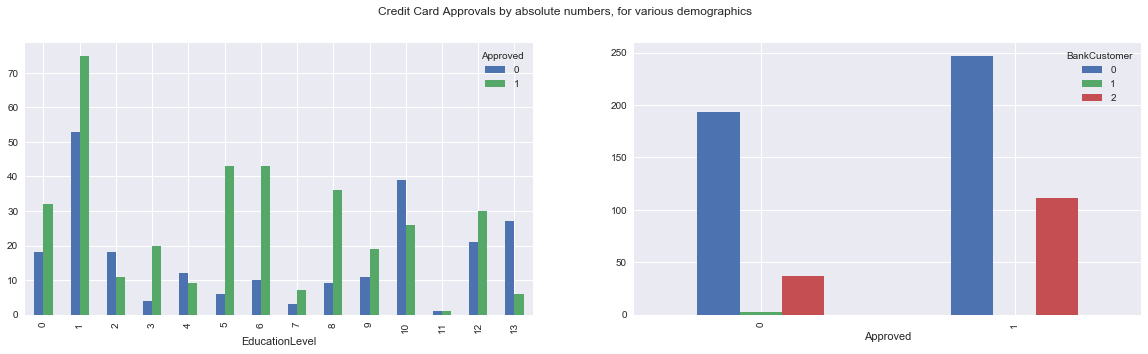

In [361]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,5)
fig.suptitle('Credit Card Approvals by absolute numbers, for various demographics')

d = CC_data.groupby(['Approved', 'EducationLevel']).size()
p = d.unstack(level=0).plot(kind='bar', ax=ax[0])

d = CC_data.groupby(['Approved', 'BankCustomer']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])


# __Feature Engineering__: Adding new feature (Debt to income Ratio)

In [247]:
CC_data['debtIncomeRatio'] = CC_data['Debt']/ CC_data['Income']

#CC_temp = CC_data.copy()
CC_data = CC_data.replace([np.inf, -np.inf], np.nan)
CC_data.fillna(CC_data.mean(), inplace=True)

plotDistPlot(CC_data['debtIncomeRatio'])

In [250]:
#label Encoder for coding the CAtegorical features like ethnicity and education level

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
'''
Looping for each object type column
Using label encoder to convert into numeric types
'''
for col in CC_data:
    if CC_data[col].dtypes=='object':
        CC_data[col]=le.fit_transform(CC_data[col])

In [251]:
CC_data.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,debtIncomeRatio
580,1,38.67,0.210,1,0,8,7,0.085,1,0,0,1,0,70,0,0,0.372925
581,1,25.75,0.750,1,0,1,0,0.250,1,0,0,0,0,86,23,0,0.032609
582,0,46.08,3.000,1,0,1,7,2.375,1,1,8,1,0,102,4159,0,0.000721
583,0,21.50,6.000,1,0,0,7,2.500,1,1,3,0,0,144,918,0,0.006536
584,1,20.08,0.125,1,0,10,7,1.000,0,1,1,0,0,59,768,0,0.000163
585,1,20.50,2.415,1,0,1,7,2.000,1,1,11,1,0,40,3000,0,0.000805
586,0,29.50,0.460,1,0,8,7,0.540,1,1,4,0,0,97,500,0,0.000920
587,1,16.17,0.040,1,0,1,7,0.040,0,0,0,0,0,0,0,0,0.372925
588,1,22.67,0.165,1,0,1,4,2.250,0,0,0,1,2,0,0,0,0.372925
589,0,25.58,0.000,1,0,1,7,0.000,0,0,0,0,1,0,0,0,0.372925


## 4. Data Modeling and Evaluation

In [356]:
#Selected Features
colList = ['debtIncomeRatio',
 'Male',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'Citizen',
 'Income',
 'Approved']

In [357]:
CC_data = CC_data[colList]
#Shuffling the columns to get a stratified sample
CC_data = CC_data.sample(frac=1)
#Getting all values from dataframe to get train test split
CC_data_vals = CC_data.values

In [345]:
# Creating new variable to input features and labels
X,y = CC_data_vals[:,0:14] , CC_data_vals[:,14]

'''
Spliting the data into training and testing sets
'''
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [346]:
#Using MinMaxScaler to normalize values between 0 and 1 to converge the model faster

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [347]:
rescaledX = scaler.transform(X)

In [362]:
#utility functions to plot AUC characterstics and confusion Matrix
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

# Random Forest Classifier

Random Forest classifier has accuracy of:  0.8898305084745762


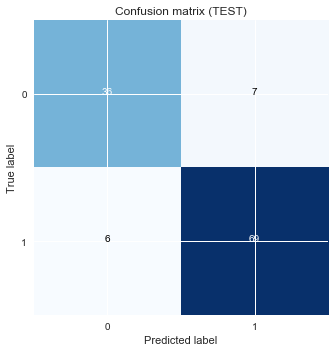

In [376]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, Y_train)
y_pred = rf.predict(rescaledX_test)
y_train_pred = rf.predict(rescaledX_train)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)
threshold = 0.5

fig,ax = plt.subplots()
fig.set_size_inches(15,5)

plot_cm(ax, Y_test, y_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
   
plt.tight_layout()
plt.show()

__Finding the feature Importance__
According to the Random Forest Classifier, PriorDefault is the most important feature, followed by Debt, Credit Score and Employment status.

Feature ranking:
1. feature 9 (0.244399)
2. feature 3 (0.105973)
3. feature 8 (0.102081)
4. feature 11 (0.098050)
5. feature 13 (0.088299)
6. feature 2 (0.081727)
7. feature 6 (0.067242)
8. feature 0 (0.064635)
9. feature 10 (0.059527)
10. feature 7 (0.029065)
11. feature 4 (0.015980)
12. feature 1 (0.014539)
13. feature 5 (0.014303)
14. feature 12 (0.014180)


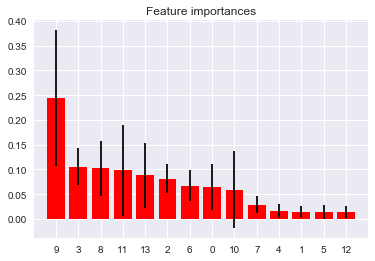

In [349]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Which attribute has played most important role in credit card approval decision?

Index(['debtIncomeRatio', 'Male', 'Age', 'Debt', 'Married', 'BankCustomer',
       'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'Citizen', 'Income'],
      dtype='object')


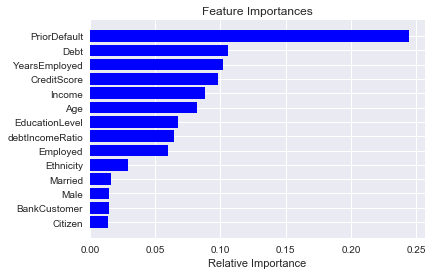

In [350]:
# copy of CC_data is in CC_data2 to keep the original data frame intact
CC_data2 = CC_data.copy()
CC_data2 = CC_data2.drop(['Approved'], axis=1)

#seelcting features
features = CC_data2.columns
print(features)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [351]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [367]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Logistic regression classifier has accuracy of:  0.6186440677966102


array([[ 4, 39],
       [ 6, 69]], dtype=int64)

In [368]:
y_probs = logreg.predict_proba(rescaledX)
y_class = logreg.predict(rescaledX)

y_probs = np.delete(y_probs, 0, 1)

# 0 is +, 1 is -
CC_data["Probs"] = np.ravel(y_probs).tolist()
CC_data["Class"] = np.ravel(y_class).tolist()

In [1]:
from sklearn.metrics import f1_score
print("F1 Score is: ", f1_score(Y_test, y_pred, average='micro'))

NameError: name 'Y_test' is not defined

In [370]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary
param_grid = dict(tol=tol, max_iter=max_iter)

In [371]:
# Initializing GridSearchCV
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Rescaling the entire data set with all the predictive features
rescaledX = scaler.fit_transform(X)

# Calculating and summarizing the final results
grid_model_result = grid_model.fit(rescaledX, y)
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_ 
print("Best: %f using %s" %  (best_score, best_params))

Best: 0.847458 using {'max_iter': 100, 'tol': 0.01}


# Boosted Decision Trees

-  In XGBoost, we fit a model on the gradient of loss generated from the previous step.

[0]	eval-error:0.135593	eval-logloss:0.535874	train-error:0.082627	train-logloss:0.512952
[1]	eval-error:0.144068	eval-logloss:0.465206	train-error:0.069915	train-logloss:0.410363
[2]	eval-error:0.144068	eval-logloss:0.424114	train-error:0.063559	train-logloss:0.341734
[3]	eval-error:0.169492	eval-logloss:0.39619	train-error:0.055085	train-logloss:0.291126
[4]	eval-error:0.161017	eval-logloss:0.37801	train-error:0.055085	train-logloss:0.255059


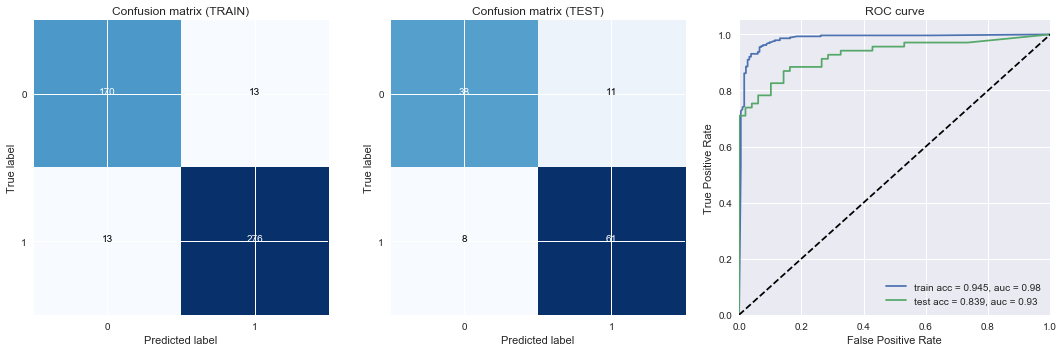

In [299]:
import xgboost as xgb

dtrain = xgb.DMatrix(rescaledX_train, label=Y_train)
dtest = xgb.DMatrix(rescaledX_test, label=Y_test)

num_round = 5
evallist  = [(dtest,'eval'), (dtrain,'train')]
param = {'objective':'binary:logistic', 'silent':1, 'eval_metric': ['error', 'logloss']}

bst = xgb.train( param, dtrain, num_round, evallist )

threshold = 0.5
Y_train_pred = bst.predict(dtrain)
Y_test_pred = bst.predict(dtest)

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  Y_train, Y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  Y_test, Y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], Y_train, Y_train_pred, Y_test, Y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

# Neural Networks

In [377]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [381]:
input_dim = rescaledX_train.shape[1]

model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1,  activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [382]:
from keras.callbacks import Callback

class BatchLogger(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl = BatchLogger()

In [383]:
history = model.fit(
              np.array(rescaledX_train), np.array(Y_train),
              batch_size=25, epochs=7, verbose=1, callbacks=[bl],
              validation_data=(np.array(rescaledX_test), np.array(Y_test)))

Train on 472 samples, validate on 118 samples
Epoch 1/7
472/472 [==============================] - 1s 2ms/step - loss: 0.7002 - acc: 0.4343 - val_loss: 0.6619 - val_acc: 0.8136
Epoch 2/7
472/472 [==============================] - 0s 149us/step - loss: 0.6042 - acc: 0.8326 - val_loss: 0.5234 - val_acc: 0.8390
Epoch 3/7
472/472 [==============================] - 0s 233us/step - loss: 0.5118 - acc: 0.8475 - val_loss: 0.4631 - val_acc: 0.8475
Epoch 4/7
472/472 [==============================] - 0s 213us/step - loss: 0.4700 - acc: 0.8496 - val_loss: 0.4204 - val_acc: 0.8814
Epoch 5/7
472/472 [==============================] - 0s 191us/step - loss: 0.4378 - acc: 0.8665 - val_loss: 0.4033 - val_acc: 0.8729
Epoch 6/7
472/472 [==============================] - 0s 169us/step - loss: 0.4388 - acc: 0.8475 - val_loss: 0.4333 - val_acc: 0.8475
Epoch 7/7
472/472 [==============================] - 0s 169us/step - loss: 0.4233 - acc: 0.8559 - val_loss: 0.3876 - val_acc: 0.8898


In [384]:
score = model.evaluate(np.array(rescaledX_test), np.array(Y_test), verbose=0)
print('Test log loss:', score[0])
print('Test accuracy:', score[1])

Test log loss: 0.3875564064009715
Test accuracy: 0.889830507464328


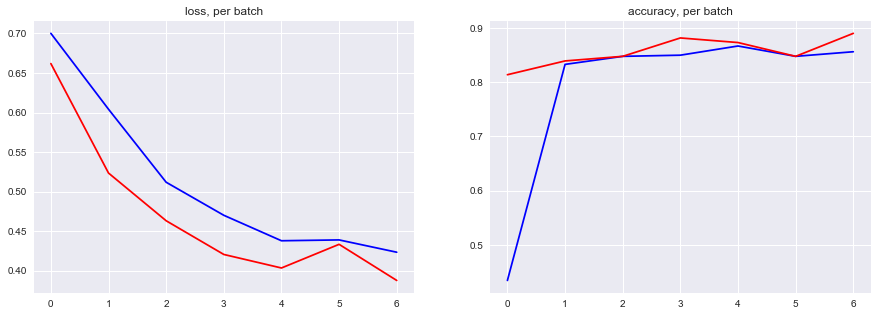

In [385]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl.get_values('loss',1), 'b-', label='train');
plt.plot(bl.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl.get_values('acc',1), 'b-', label='train');
plt.plot(bl.get_values('val_acc',1), 'r-', label='test');
plt.show()

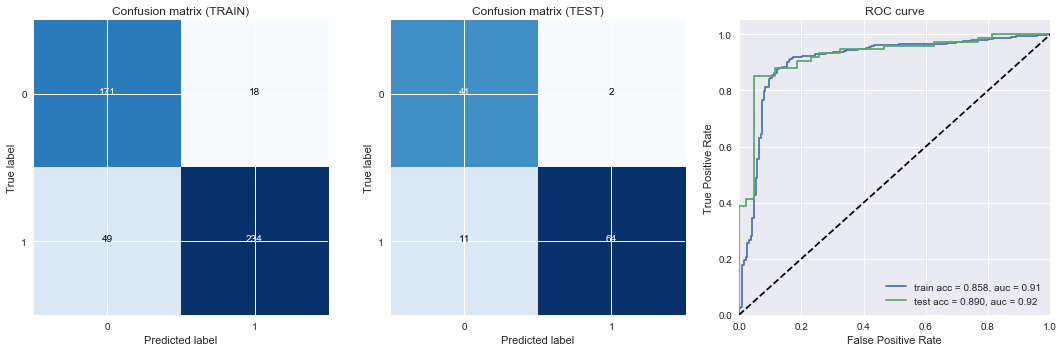

In [387]:
y_train_pred = model.predict_on_batch(np.array(rescaledX_train))[:,0]
y_test_pred = model.predict_on_batch(np.array(rescaledX_test))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], Y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], Y_test, y_test_pred, [0,1], 'Confusion matrix (TEST)')
plot_auc(ax[2], Y_train, y_train_pred, Y_test, y_test_pred)
    
plt.tight_layout()
plt.show()

# SVM: with 3 fold cross validation

In [353]:
clf = svm.SVC(kernel='linear')
clf.fit(rescaledX_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Support Vector Machine Model w/ 3-Fold CV: 88.13559322033898 %


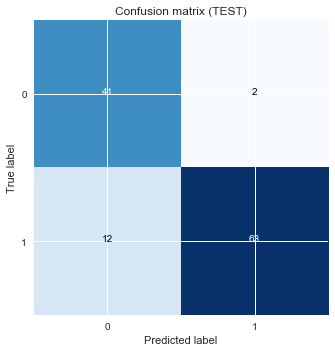

In [374]:
print('Support Vector Machine Model w/ 3-Fold CV:', clf.score(rescaledX_test, Y_test)*100 , "%")
y_test_pred  = clf.predict(rescaledX_test)
fig,ax = plt.subplots()
fig.set_size_inches(15,5)

plot_cm(ax, Y_test, y_test_pred, [0,1], 'Confusion matrix (TEST)')
plt.tight_layout()
plt.show()

# Testing on the sample of 100 data points given

In [388]:
df1 = pd.read_csv('test.csv')

df1.replace('?', np.NaN, inplace = True)
df1['Age']=df1['Age'].astype(float)
df1 = df1.drop(['DriversLicense', 'ZipCode'], axis=1)
imputeWithMode(df1)

In [389]:
le = LabelEncoder()
#Using label encoder to convert into numeric types
for col in df1:
    if df1[col].dtypes=='object':
        df1[col]=le.fit_transform(df1[col])

In [390]:
df1['debtIncomeRatio'] = df1['Debt']/ df1['Income']
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1.fillna(df1.mean(), inplace=True)
df1 = df1[colList]
df1 = df1.sample(frac=1)
df1_vals =df1.values
X1,y1 = df1_vals[:,0:14] , df1_vals[:,14]

In [393]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_test = scaler.fit_transform(X1)

Support Vector Machine Model w/ 3-Fold CV: 94.0 %


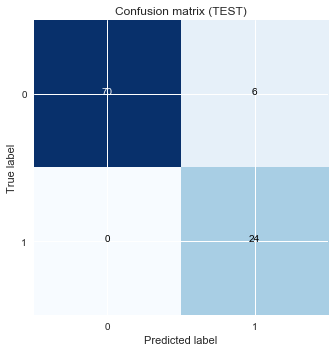

In [396]:
y_pred1 = clf.predict(rescaledX_test)
print('Support Vector Machine Model w/ 3-Fold CV:', clf.score(rescaledX_test, y1)*100 , "%")

# Evaluate the confusion_matrix
fig,ax = plt.subplots()
fig.set_size_inches(15,5)

plot_cm(ax, y1, y_pred1, [0,1], 'Confusion matrix (TEST)')
plt.tight_layout()
plt.show()